<a href="https://colab.research.google.com/github/kotech1/computervision/blob/master/03_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지를 읽어들이기

In [90]:
# URL로부터 이미지 파일 저장

img_url = 'http://sipi.usc.edu/database/preview/misc/4.2.01.png'
filename = 'milk.png'
#img_url = 'http://data.si.re.kr/photo_ndownload/21555'
#filename = 'seoul.jpg'

img_path = keras.utils.get_file(filename, img_url)
img_path

'/root/.keras/datasets/milk.png'

**pillow**

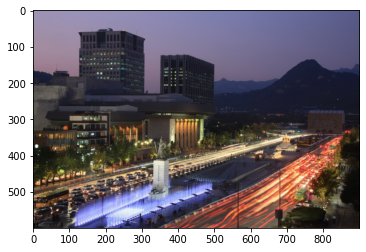

In [50]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

# pillow
from PIL import Image

img = Image.open(img_path) # use Image.open(image_location)
image = np.array(img.convert('RGB')) # to convert img object to array value use np.array

plt.imshow(image)

In [44]:
print(image[0][0])

[95 87 86]


**OpenCV**

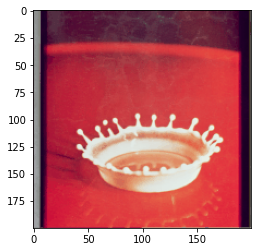

In [92]:
import cv2

image = cv2.imread(img_path)
#print(image[0][0])
# convert opencv RGB for opencv
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#print(image[0][0])
plt.imshow(image)

array([0.37254903, 0.34117648, 0.3372549 ], dtype=float32)

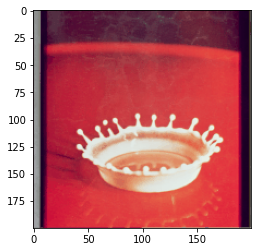

In [58]:
from matplotlib import image as mp_image
img = mp_image.imread(img_path)
plt.imshow(img)
img[0][0]

MNIST 데이터

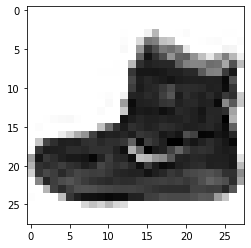

In [5]:
from tensorflow import keras
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
plt.imshow(train_images[0], cmap=plt.cm.binary)
#plt.imshow(train_images[0], cmap=plt.cm.gray)

# 이미지 저장

In [ ]:
# PIL
from PIL import Image
import numpy as np

PIL_image = Image.fromarray(np.uint8(image)).convert('RGB')
PIL_image.save('test.png')

In [ ]:
# opencv
import cv2

# convert opencv RGB for opencv
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imwrite('test.png', image)

True

In [35]:
# matplotlib
from matplotlib import pyplot as plt
plt.imsave('test.png', image)


In [40]:
! ls -l test.png

-rw-r--r-- 1 root root 53477 Sep  3 12:13 test.png


-rw-r--r-- 1 root root 53477 Sep  3 12:13 test.png


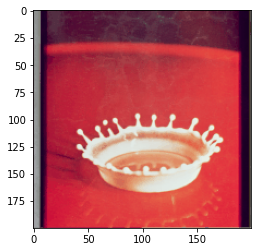

In [39]:
from matplotlib import image as mp_image
img = mp_image.imread('test.png')
plt.imshow(image)

# 매트릭스 dot product

**매트릭스 연산**

![](https://latex.codecogs.com/gif.latex?%5Cbegin%7Bbmatrix%7D%2010%5C%5C4%20%5Cend%7Bbmatrix%7D%20%3D%20%5Cbegin%7Bbmatrix%7D%202%20%26%201%5C%5C%200%20%26%201%20%5Cend%7Bbmatrix%7D%20%5Cbegin%7Bbmatrix%7D%203%5C%5C%204%20%5Cend%7Bbmatrix%7D)


In [28]:
import numpy as np
  
w = np.array([ [ 2, 1 ],
               [ 0, 1 ] ])
x = np.array(  [3, 4]  )
y = np.dot(w,x)
print(y)

[10  4]


In [20]:
# 컬럼 벡터 (수식과 같은 모양)
x = np.array([ [3], 
               [4] ])
y = np.dot(w,x)
print(y)
print(y.shape)

[[10]
 [ 4]]
(2, 1)


**매트릭스 곱하기**  
![](https://latex.codecogs.com/gif.latex?%5Cfn_jvn%20%5CLARGE%20%28m%2Cl%29%20%3D%20%28m%2Cn%29%5Ccdot%28n%2Cl%29)


In [10]:
# (2,2)=(2,2).(2,2)
x = np.array([ [ 3, 3 ],
               [ 4, 4 ] ])
y = np.dot(w,x)
y

array([[10, 10],
       [ 4,  4]])

In [32]:
# 오류가 납니다. 왜 그런지 생각해봅시다.
x = np.array([ [ 3, 4 ],
               [ 3, 4 ],
               [ 3, 4 ] ])
y = np.dot(w,x)
y

ValueError: ignored

**전치행렬**  
  
  ![](https://latex.codecogs.com/gif.latex?%5Cfn_jvn%20%5CLARGE%20%5Cleft%28w%5ET%5Cright%29_%7Bij%7D%3Dw_%7Bji%7D)

In [33]:
# transpose (전치 행렬)
x2 = x.T
print(x2)
y = np.dot(w,x2)
print(y)

[[3 3 3]
 [4 4 4]]
[[10 10 10]
 [ 4  4  4]]


![](https://latex.codecogs.com/gif.latex?%5Clarge%20%5Cbegin%7Bbmatrix%7D%2010%20%26%2010%20%26%2010%5C%5C4%20%26%204%26%204%20%5Cend%7Bbmatrix%7D%20%3D%20%5Cbegin%7Bbmatrix%7D%202%20%26%201%5C%5C%200%20%26%201%20%5Cend%7Bbmatrix%7D%20%5Cbegin%7Bbmatrix%7D%203%20%26%203%263%5C%5C%204%264%264%20%5Cend%7Bbmatrix%7D)

## Affine 변환

8192/2823 [=======================================================================================] - 0s 0us/step


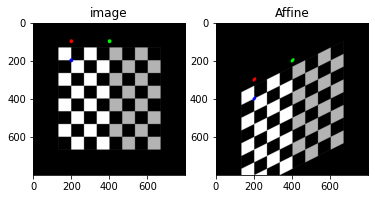

In [59]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras

img_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Checkerboard_identity.svg/800px-Checkerboard_identity.svg.png'
img_path = keras.utils.get_file("checkerboard.jpg", img_url)
img = cv2.imread(img_path)

rows, cols, ch = img.shape

# 점3개를 변환 전과 변환 후로 나누어 지정
pts1 = np.float32([[200,100],[400,100],[200,200]])
pts2 = np.float32([[200,300],[400,200],[200,400]])

# pts1의 좌표에 표시. Affine 변환 후 이동 점 확인.
cv2.circle(img, (200,100), 10, (255,0,0),-1)
cv2.circle(img, (400,100), 10, (0,255,0),-1)
cv2.circle(img, (200,200), 10, (0,0,255),-1)

# Affine 변환 텐서 얻기
M = cv2.getAffineTransform(pts1, pts2)

# Affine 변환하기
dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.show()

In [68]:
print(M)
A = M[:, :2] # same as a=M[:, 0:2]
b = M[:, 2:]
print(A)
print(b)


[[  1.    0.    0. ]
 [ -0.5   1.  300. ]]
[[ 1.   0. ]
 [-0.5  1. ]]
[[  0.]
 [300.]]


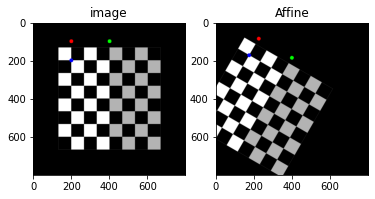

In [74]:
M = np.array([ [np.cos(np.pi/6), -np.sin(np.pi/6), 100],
               [np.sin(np.pi/6),  np.cos(np.pi/6), -100] ])
# Affine 변환하기
dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.show()

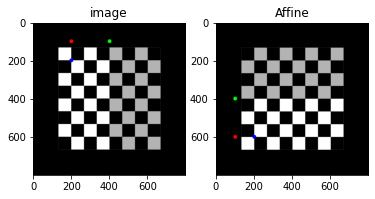

In [ ]:
center = (cols/2, rows/2)
angle = 90
scale = 1
# 회전 변환
M = cv2.getRotationMatrix2D(center, angle, scale)
# Affine 변환하기
dst = cv2.warpAffine(img, M, (cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.show()

#컨볼루션 필터

In [110]:
x = np.array([[1, 1, 1, 0, 0],
              [0, 1, 1, 1, 0],
              [0, 0, 1, 1, 1],
              [0, 0, 1, 1, 0],
              [0, 1, 1, 0, 0]],dtype=float)
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1],],)
# borderType=cv2.BORDER_CONSTANT padding with zero
y = cv2.filter2D(x, -1, kernel, borderType=cv2.BORDER_CONSTANT)
print(y)

[[3. 5. 5. 3. 1.]
 [3. 6. 7. 6. 3.]
 [1. 4. 7. 7. 4.]
 [1. 4. 6. 6. 3.]
 [1. 3. 4. 3. 1.]]


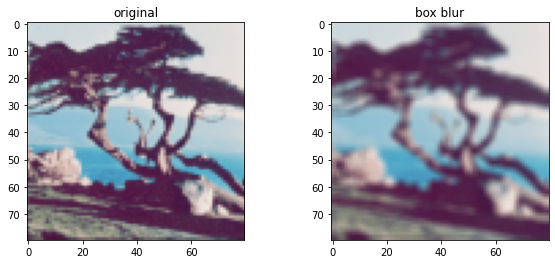

In [121]:
img_url = 'http://sipi.usc.edu/database/preview/misc/4.1.06.png'
filename = 'tree.png'

img_path = keras.utils.get_file(filename, img_url)

src = cv2.imread(img_path)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
image = cv2.resize(src, dsize=(80, 80), interpolation=cv2.INTER_AREA)

box_blur = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1] ])/9.
dst = cv2.filter2D(image, -1, box_blur)
plt.figure(figsize=(10, 4))
plt.subplot(121),plt.imshow(image),plt.title('original')
plt.subplot(122),plt.imshow(dst),plt.title('box blur')
plt.show()

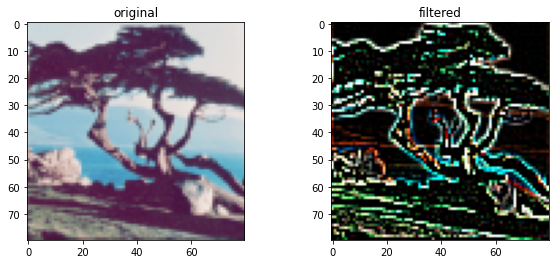

In [122]:
edge_detect = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1] ])
kernel = edge_detect
dst = cv2.filter2D(image, -1, kernel)
plt.figure(figsize=(10, 4))
plt.subplot(121),plt.imshow(image),plt.title('original')
plt.subplot(122),plt.imshow(dst),plt.title('filtered')
plt.show()

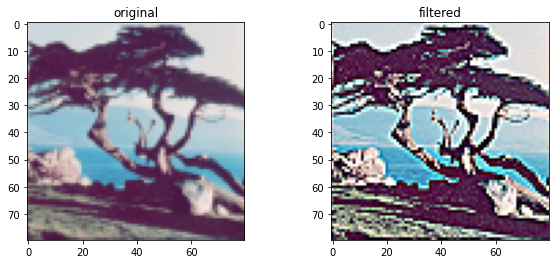

In [124]:
sharpen = np.array([[ 0, -1,  0],
                    [-1,  5, -1],
                    [ 0, -1,  0] ])
kernel = sharpen
dst = cv2.filter2D(image, -1, kernel)
plt.figure(figsize=(10, 4))
plt.subplot(121),plt.imshow(image),plt.title('original')
plt.subplot(122),plt.imshow(dst),plt.title('filtered')
plt.show()